In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt


In [2]:
# Data preprocessing
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


# Download and load the CIFAR-10 dataset.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=1)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=1)


100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\datasets\cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


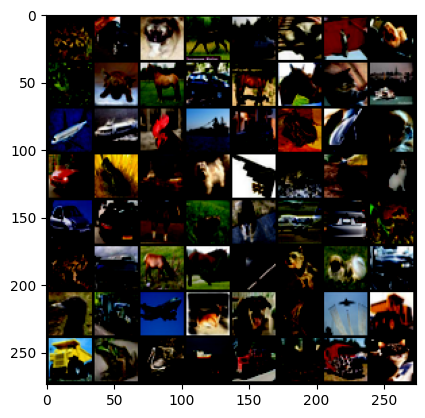

In [3]:
# Display the images.
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Create a grid to display images.
imshow = torchvision.utils.make_grid(images)


# Convert to a NumPy array and remove normalization.
imshow = imshow.numpy().transpose((1, 2, 0))


# Show images.
plt.imshow(imshow)
plt.show()


In [4]:
# Define the LeNet network structure.
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()  # Call the constructor of the parent class nn.Module.
        # For the first convolutional layer, the number of input channels is 3, the number of output channels is 6, and the size of the convolution kernel is 5 x 5.
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        # For the second convolutional layer, the number of input channels is 6, the number of output channels is 16, and the size of the convolution kernel is 5 x 5.
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        # For the first fully-connected layer, the number of input features is 16 x 5 x 5, and the number of output features is 120.
        self.fc1 = nn.Linear(16*5*5, 120)
        # For the second fully-connected layer, the number of input features is 120, and the number of output features is 84.
        self.fc2 = nn.Linear(120, 84)
        # For the third fully-connected layer (output layer), the number of input features is 84, and the number of output features is 10.
        self.fc3 = nn.Linear(84, 10)
 
    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        # Perform 2 x 2 max pooling on x.
        x = torch.max_pool2d(x, 2)
        # x passes through the second convolutional layer, and then applies the tanh activation function.
        x = torch.tanh(self.conv2(x))
        # Perform 2 x 2 max pooling on x.
        x = torch.max_pool2d(x, 2)
        # Flatten x into a one-dimensional vector and input it to the fully-connected layer. The size is (batch_size, 16 x 5 x 5).
        x = x.view(-1, 16*5*5)
        x = torch.tanh(self.fc1(x))
        # x passes through the second fully-connected layer and then applies the tanh activation function.
        x = torch.tanh(self.fc2(x))
        # x passes through the third fully-connected layer (output layer). Generally, the activation function is not used here because the output value may be used for tasks such as classification.
        x = self.fc3(x)
        return x
 
# Instantiate the LeNet network.
net = LeNet()
net.parameters # View the model parameters.


<bound method Module.parameters of LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [7]:
# Check whether there are trained parameters to load.
if os.path.isfile("cifar10.pth"): 
    net.load_state_dict(torch.load("cifar10.pth"))
# Store the loss value.
loss_history = []


# Train the network.
for epoch in range(50): # 50 epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data


        optimizer.zero_grad()


        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        if i % 200 == 199: 
            print(f'[Epoch: {epoch + 1}, Batch: {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0
        
        # Record the loss value.
        loss_history.append(loss.item())


print('Finished Training')


[Epoch: 1, Batch: 200] loss: 2.286
[Epoch: 1, Batch: 400] loss: 2.183
[Epoch: 1, Batch: 600] loss: 2.081
[Epoch: 2, Batch: 200] loss: 2.007
[Epoch: 2, Batch: 400] loss: 1.978
[Epoch: 2, Batch: 600] loss: 1.941
[Epoch: 3, Batch: 200] loss: 1.880
[Epoch: 3, Batch: 400] loss: 1.850
[Epoch: 3, Batch: 600] loss: 1.798
[Epoch: 4, Batch: 200] loss: 1.726
[Epoch: 4, Batch: 400] loss: 1.681
[Epoch: 4, Batch: 600] loss: 1.647
[Epoch: 5, Batch: 200] loss: 1.613
[Epoch: 5, Batch: 400] loss: 1.594
[Epoch: 5, Batch: 600] loss: 1.576
[Epoch: 6, Batch: 200] loss: 1.539
[Epoch: 6, Batch: 400] loss: 1.514
[Epoch: 6, Batch: 600] loss: 1.495
[Epoch: 7, Batch: 200] loss: 1.473
[Epoch: 7, Batch: 400] loss: 1.452
[Epoch: 7, Batch: 600] loss: 1.445
[Epoch: 8, Batch: 200] loss: 1.430
[Epoch: 8, Batch: 400] loss: 1.405
[Epoch: 8, Batch: 600] loss: 1.395
[Epoch: 9, Batch: 200] loss: 1.378
[Epoch: 9, Batch: 400] loss: 1.390
[Epoch: 9, Batch: 600] loss: 1.352
[Epoch: 10, Batch: 200] loss: 1.353
[Epoch: 10, Batch: 

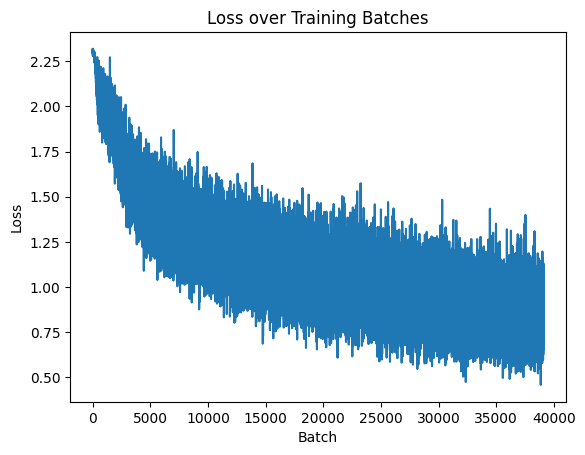

In [8]:
# Draw the loss curve.
plt.plot(loss_history)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss over Training Batches')
plt.show()


In [9]:
# Test the performance of the network with the test set.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10000 test images: 64.70%
